In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload

In [3]:
import load_windgps_data_to_pandas
import process_windgps_data

# Instructions

Run notebook for sensor_orientation = 'horizontal' and 'vertical'

In [4]:
sensor_orientation = 'horizontal' # horizontal or vertical

# Parameters

In [5]:
# where your binary data files are
data_directory = '../data_experiments_raw/raw_windstation_data/' + sensor_orientation + '_wind/'
correct_year = 2021
out = '../data_experiments_preprocessed/' 

# Load data

In [6]:
df = load_windgps_data_to_pandas.load_data_from_directory(data_directory)

Number of data records per block:  110
Number of fill bytes per block:  100


# Fix millis - if necessary

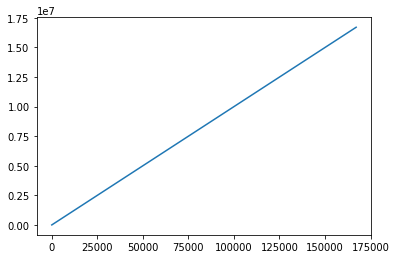

In [7]:
plt.plot(df.millis)

# Fix GPS Date

### Look at raw data

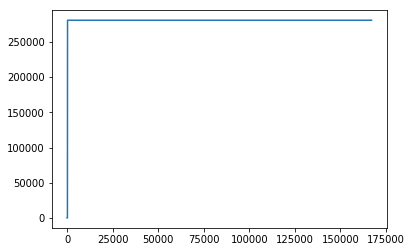

In [8]:
plt.plot(df.gps_date)

### Fix it

In [9]:
df = process_windgps_data.fix_gps_date(df, correct_year=correct_year)

### Check the results

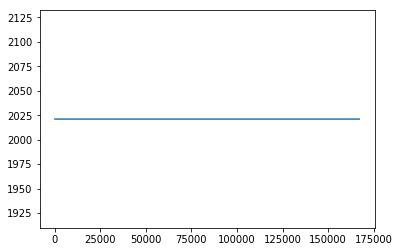

In [10]:
plt.plot(df['year'])

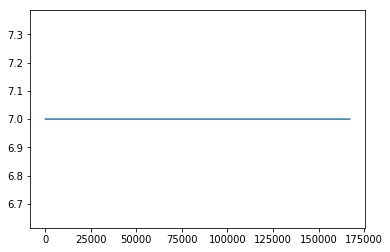

In [11]:
plt.plot(df.month)

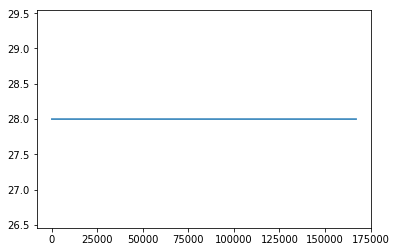

In [12]:
plt.plot(df.day)

# Interpolate epoch time

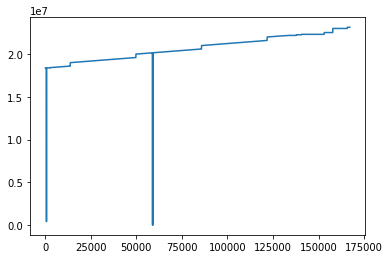

In [13]:
plt.plot(df.gps_time)

In [14]:
df = process_windgps_data.calc_interpolated_epoch_time(df)

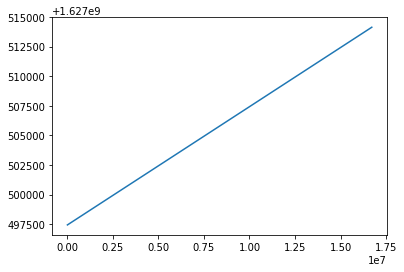

In [15]:
plt.plot(df.millis, df.time_epoch)

# Parse wind data

In [16]:
if sensor_orientation == 'horizontal':
    df = process_windgps_data.parse_and_save_several_wind_strings(df, wind_strings=['D', 'S2'])
else:
    df = process_windgps_data.parse_and_save_several_wind_strings(df, wind_strings=['W'])

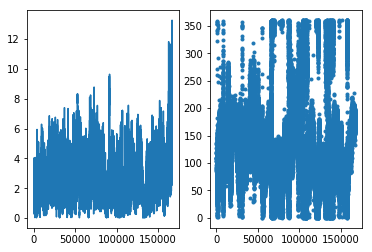

In [17]:
def plot(df, sensor_orientation):
    if sensor_orientation == 'horizontal':
        fig = plt.figure()
        ax = fig.add_subplot(121)
        ax.plot(df.S2)

        ax = fig.add_subplot(122)
        ax.plot(df.D, '.')

    else:
        fig = plt.figure()
        ax = fig.add_subplot(121)
        ax.plot(df.W)
        
plot(df, sensor_orientation)

# Save it

In [18]:
df.year.iloc[0]

2021.0

In [19]:
datestr = str(int(df.year.iloc[0])) + str(int(df.month.iloc[0])) + str(int(df.day.iloc[0])) +\
          '_' + str(int(df.hour.iloc[0])) + str(int(df.minute.iloc[0])) + str(int(df.second.iloc[0]))

In [20]:
fname = datestr + '_' + 'windgps_data_' + sensor_orientation + '.hdf'

In [21]:
full_fname = os.path.join(out, fname)

In [22]:
df.to_hdf(full_fname, 'windgps')

/home/caveman/BMD2/lib/python3.5/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['wind', 'gps_date_str', 'gps_time_str']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


# Read it

In [23]:
# read it
df_read = pd.read_hdf(full_fname)

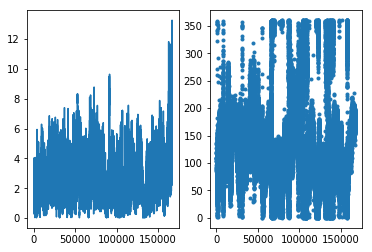

In [24]:
plot(df_read, sensor_orientation)

In [25]:
df_read.keys()

Index(['millis', 'lat', 'lon', 'gps_time', 'gps_date', 'wind', 'gps_date_str',
       'year', 'month', 'day', 'gps_time_str', 'hour', 'minute', 'second',
       'time_epoch', 'D', 'S2'],
      dtype='object')